<a href="https://colab.research.google.com/github/EX1cyclone/635_project_pollution_detect/blob/main/CNN__model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = '/content/drive/MyDrive/ECE635/beijing+multi+site+air+quality+data/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Handling missing values with linear spline interpolation
data.interpolate(method='linear', inplace=True)

# Encode categorical variables (Example: Wind Direction)
# Replace 'wind_direction_column' with your actual column name
if 'wind_direction_column' in data.columns:
    data['wind_direction_encoded'] = data['wind_direction_column'].apply(lambda x: ... )  # Define your encoding logic

# Normalize PM2.5 concentration and other features
scaler = MinMaxScaler()
data['PM2.5_normalized'] = scaler.fit_transform(data[['PM2.5']])  # Replace 'PM2.5' with your actual column name

# Feature selection using Pearson correlation
correlation_threshold = 0.5  # Define your correlation threshold
correlation_matrix = data.corr()
features = correlation_matrix.index[abs(correlation_matrix["PM2.5_normalized"]) > correlation_threshold]

# Selected features dataset
selected_data = data[features]


<ipython-input-2-b88a55376396>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'selected_data' is your preprocessed dataset
X = selected_data.drop('PM2.5_normalized', axis=1)  # Features
y = selected_data['PM2.5_normalized']  # Target variable

# Splitting the dataset into training and testing sets
# Adjust test_size as needed (e.g., 0.2 for 20%, 0.3 for 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Pandas DataFrame to NumPy array and then reshape
num_features = X_train.shape[1]  # Number of features
num_timesteps = 1  # Set to 1 if your data is not time-series

X_train_reshaped = X_train.values.reshape((-1, num_timesteps, num_features))
X_test_reshaped = X_test.values.reshape((-1, num_timesteps, num_features))


Epoch 1/200
1169/1169 [==============================] - 16s 5ms/step - loss: 0.0011 - val_loss: 2.2193e-04
Epoch 2/200
1169/1169 [==============================] - 5s 4ms/step - loss: 9.9663e-04 - val_loss: 3.9108e-04
Epoch 3/200
1169/1169 [==============================] - 5s 4ms/step - loss: 8.6501e-04 - val_loss: 0.0023
Epoch 4/200
1169/1169 [==============================] - 5s 4ms/step - loss: 8.2321e-04 - val_loss: 1.6771e-04
Epoch 5/200
1169/1169 [==============================] - 5s 4ms/step - loss: 8.2240e-04 - val_loss: 5.9914e-04
Epoch 6/200
1169/1169 [==============================] - 5s 4ms/step - loss: 7.2082e-04 - val_loss: 6.7721e-04
Epoch 7/200
1169/1169 [==============================] - 5s 4ms/step - loss: 7.0092e-04 - val_loss: 1.3934e-04
Epoch 8/200
1169/1169 [==============================] - 5s 4ms/step - loss: 6.2983e-04 - val_loss: 1.6390e-04
Epoch 9/200
1169/1169 [==============================] - 5s 4ms/step - loss: 5.8494e-04 - val_loss: 1.9070e-04
Epoch 10

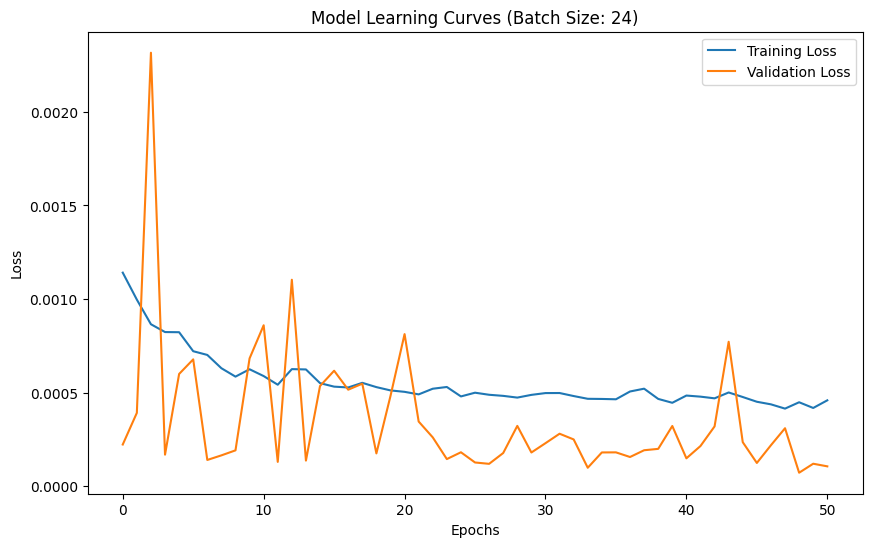

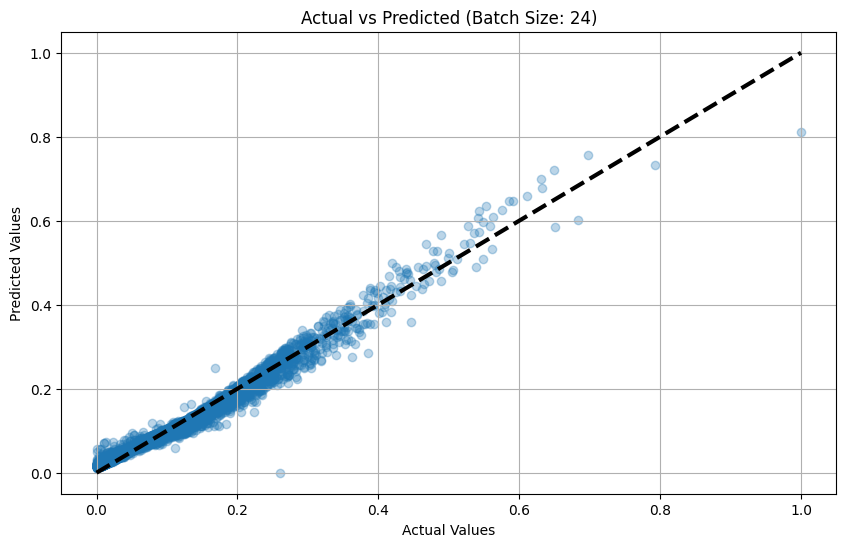

Epoch 1/200
877/877 [==============================] - 6s 5ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2/200
877/877 [==============================] - 4s 5ms/step - loss: 8.1159e-04 - val_loss: 2.9673e-04
Epoch 3/200
877/877 [==============================] - 4s 4ms/step - loss: 6.7585e-04 - val_loss: 1.1342e-04
Epoch 4/200
877/877 [==============================] - 4s 4ms/step - loss: 6.8804e-04 - val_loss: 4.8203e-04
Epoch 5/200
877/877 [==============================] - 4s 5ms/step - loss: 6.9195e-04 - val_loss: 2.1655e-04
Epoch 6/200
877/877 [==============================] - 4s 4ms/step - loss: 6.0318e-04 - val_loss: 7.4019e-05
Epoch 7/200
877/877 [==============================] - 4s 4ms/step - loss: 5.9371e-04 - val_loss: 7.3357e-04
Epoch 8/200
877/877 [==============================] - 4s 4ms/step - loss: 5.6355e-04 - val_loss: 8.8065e-05
Epoch 9/200
877/877 [==============================] - 4s 4ms/step - loss: 5.4358e-04 - val_loss: 6.0959e-05
Epoch 10/200
877/877 [=====

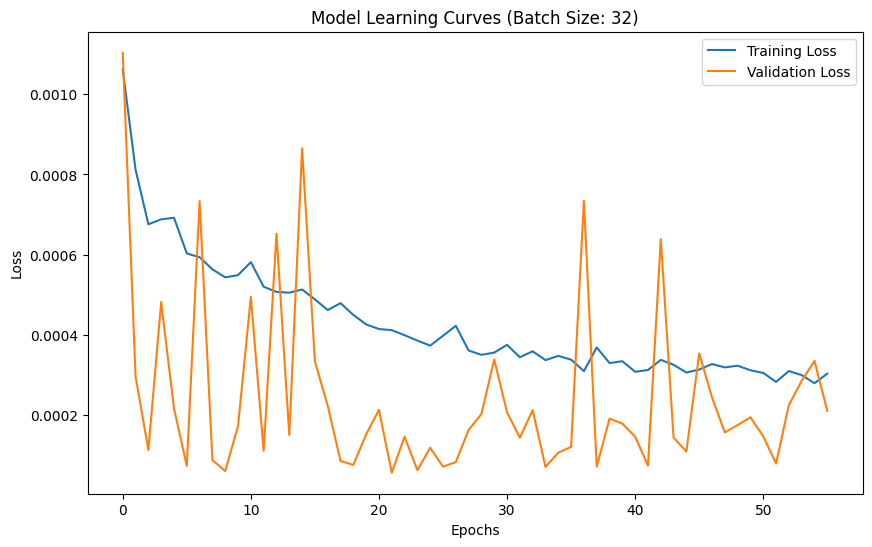

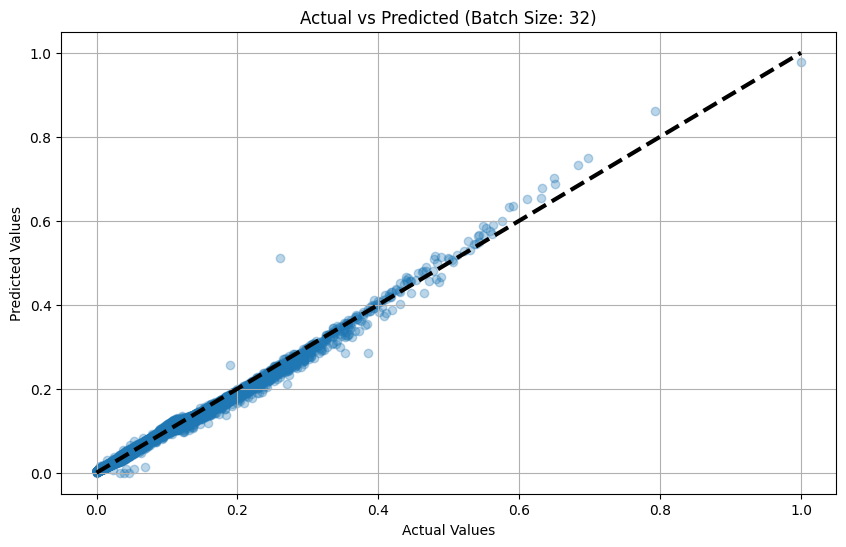

Epoch 1/200
439/439 [==============================] - 4s 5ms/step - loss: 6.6822e-04 - val_loss: 1.6657e-04
Epoch 2/200
439/439 [==============================] - 2s 5ms/step - loss: 5.8423e-04 - val_loss: 5.2617e-04
Epoch 3/200
439/439 [==============================] - 2s 5ms/step - loss: 4.7517e-04 - val_loss: 8.6860e-05
Epoch 4/200
439/439 [==============================] - 2s 4ms/step - loss: 4.3335e-04 - val_loss: 5.3061e-04
Epoch 5/200
439/439 [==============================] - 2s 4ms/step - loss: 4.2413e-04 - val_loss: 7.6888e-05
Epoch 6/200
439/439 [==============================] - 2s 4ms/step - loss: 4.2109e-04 - val_loss: 2.3409e-04
Epoch 7/200
439/439 [==============================] - 2s 4ms/step - loss: 3.5430e-04 - val_loss: 5.3966e-05
Epoch 8/200
439/439 [==============================] - 2s 4ms/step - loss: 3.6295e-04 - val_loss: 1.4656e-04
Epoch 9/200
439/439 [==============================] - 2s 5ms/step - loss: 3.8102e-04 - val_loss: 2.7750e-04
Epoch 10/200
439/43

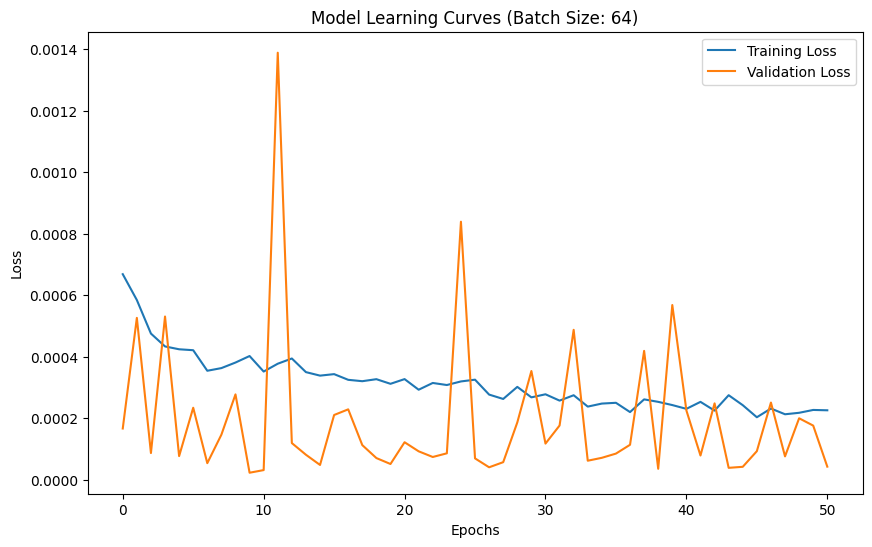

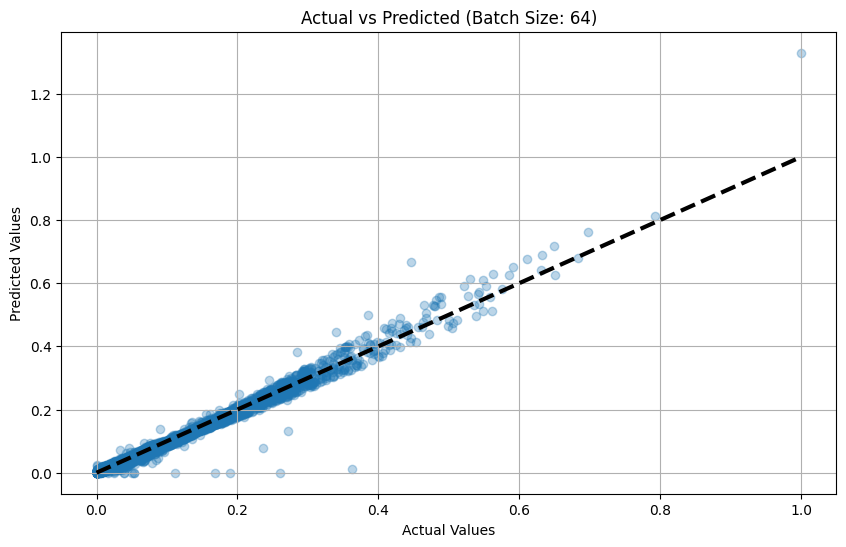

Epoch 1/200
220/220 [==============================] - 3s 5ms/step - loss: 8.3665e-04 - val_loss: 1.3888e-04
Epoch 2/200
220/220 [==============================] - 1s 4ms/step - loss: 3.5088e-04 - val_loss: 4.4969e-04
Epoch 3/200
220/220 [==============================] - 1s 4ms/step - loss: 3.2054e-04 - val_loss: 2.2419e-04
Epoch 4/200
220/220 [==============================] - 1s 5ms/step - loss: 3.0754e-04 - val_loss: 1.3732e-04
Epoch 5/200
220/220 [==============================] - 1s 5ms/step - loss: 2.8262e-04 - val_loss: 6.4678e-05
Epoch 6/200
220/220 [==============================] - 1s 5ms/step - loss: 2.2051e-04 - val_loss: 1.3566e-04
Epoch 7/200
220/220 [==============================] - 1s 5ms/step - loss: 2.5927e-04 - val_loss: 1.7444e-04
Epoch 8/200
220/220 [==============================] - 1s 4ms/step - loss: 2.3781e-04 - val_loss: 1.7004e-04
Epoch 9/200
220/220 [==============================] - 1s 4ms/step - loss: 2.5371e-04 - val_loss: 5.6206e-05
Epoch 10/200
220/22

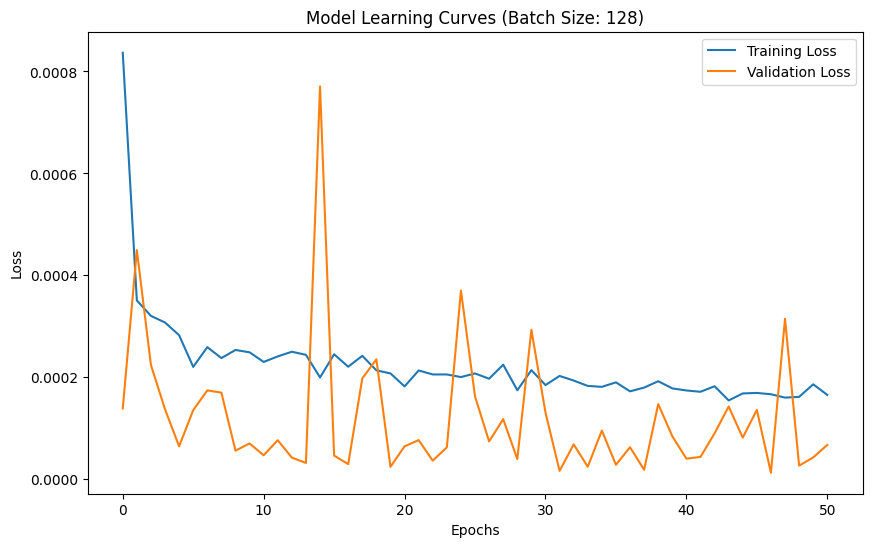

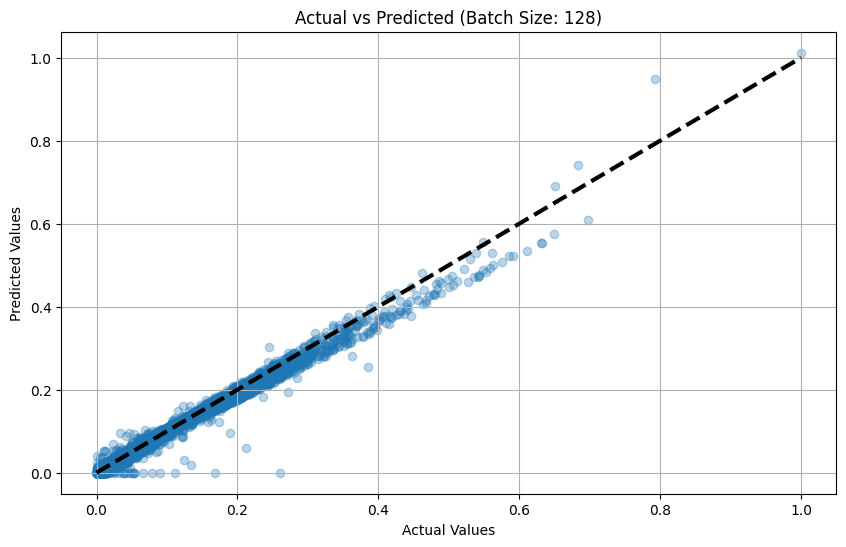

Batch Size: 24, MAE: 0.011407388374209404, RMSE: 0.014897444285452366, R2: 0.9720648778905798
Batch Size: 32, MAE: 0.005231718998402357, RMSE: 0.008603432215750217, R2: 0.9906831203774685
Batch Size: 64, MAE: 0.007000080309808254, RMSE: 0.012906283140182495, R2: 0.9790333331042966
Batch Size: 128, MAE: 0.006606473587453365, RMSE: 0.011784546077251434, R2: 0.9825195463920265


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def build_cnn_model(input_length, num_features):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(input_length, num_features)))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='relu'))
    # Define learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

def plot_actual_vs_predicted(y_true, y_pred, title='Actual vs Predicted'):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=3)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

input_length = X_train_reshaped.shape[1]
num_features = X_train_reshaped.shape[2]

batch_sizes = [24, 32, 64, 128]
results = {}

early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=50, restore_best_weights=True)

for batch_size in batch_sizes:
    model = build_cnn_model(input_length, num_features)

    history = model.fit(X_train_reshaped, y_train, epochs=200, batch_size=batch_size,
                        validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping])

    y_pred = model.predict(X_test_reshaped)

    mae = MeanAbsoluteError()
    rmse = RootMeanSquaredError()
    mae.update_state(y_test, y_pred)
    rmse.update_state(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[batch_size] = {'MAE': mae.result().numpy(), 'RMSE': rmse.result().numpy(), 'R2': r2}

    # Plotting the learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Learning Curves (Batch Size: {batch_size})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plot_actual_vs_predicted(y_test, y_pred.flatten(), title=f'Actual vs Predicted (Batch Size: {batch_size})')

for batch_size, metrics in results.items():
    print(f"Batch Size: {batch_size}, MAE: {metrics['MAE']}, RMSE: {metrics['RMSE']}, R2: {metrics['R2']}")
